In [3]:
from PIL import Image  
import numpy as np

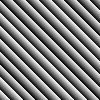

In [4]:
def rysuj_po_skosie_szare(h,w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return tab


im_skos = Image.fromarray(rysuj_po_skosie_szare(100, 100, -20, 20))

im_skos

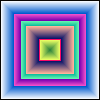

In [5]:
def rysuj_ramki_kolorowe(w, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = 6
    kolor_g = 4
    kolor_b = 2
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r)%256
        kolor_g = (kolor_g - zmiana_koloru_g)%256
        kolor_b = (kolor_b - zmiana_koloru_b)%256
    return tab

rgb_im = Image.fromarray(rysuj_ramki_kolorowe(100,20,13,4))
rgb_im



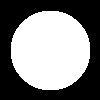

In [6]:
def rysuj_kolo(w, h, r, m, n, kolor): # koło o promieniu r i środku m, n, kolor = 0 lub 255
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if (i-n)**2+(j-m)**2 < r**2: # wzór na koło o środku (m_s, n_s) i promieniu r
                tab[i, j] = kolor 
            else: 
                tab[i, j] = 255 - kolor 
    return tab

kolo_im = Image.fromarray(rysuj_kolo(100,100,40,50,50, 255))
kolo_im

kanały obrazu RGB

In [7]:
tab = rysuj_ramki_kolorowe(100,20,13,4)

t_r = tab[:, :, 0]
print("typ danych tablicy kanału r: ", t_r.dtype)
print("rozmiar elemntu tablicy kanału r: ",t_r.itemsize)
print("rozmiar tablicy kanału r: ",t_r.shape)
print("wymiar tablicy kanału r: ",t_r.ndim)
im_r = Image.fromarray(t_r) # obraz w odcieniach szarości kanału r
print("tryb kanału r: ", im_r.mode)

t_g= tab[:, :, 1]
im_g = Image.fromarray(t_g) # obraz w odcieniach szarości kanału g

t_b = tab[:, :, 2]
im_b = Image.fromarray(t_b) # obraz w odcieniach szarości kanału b

typ danych tablicy kanału r:  uint8
rozmiar elemntu tablicy kanału r:  1
rozmiar tablicy kanału r:  (100, 100)
wymiar tablicy kanału r:  2
tryb kanału r:  L


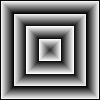

In [8]:
im_r

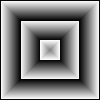

In [9]:
im_g

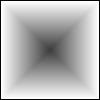

In [10]:
im_b

Tworzenie obrazu RGBA

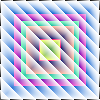

In [11]:

a = rysuj_po_skosie_szare(100, 100, 20, -20) # tablica kanału alfa
rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB 

# Rozszerzenie wymiaru tablicy a do (100, 100, 1)
a_ext = np.expand_dims(a, axis=-1)

# Połączenie wzdłuż ostatniego wymiaru
combined = np.concatenate((rgb, a_ext), axis=-1) # tak samo działa combined = np.stack((rgb[..., 0], rgb[..., 1], rgb[..., 2], a[..., 0]), axis=-1)
#combined = np.stack((rgb[..., 0], rgb[..., 1], rgb[..., 2], a_ext[..., 0]), axis=-1)
rgba_im = Image.fromarray(combined)
rgba_im

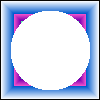

In [12]:
a = rysuj_kolo(100,100,40,50,50, 0) # tablica kanału alfa 

rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB
a_ext = np.expand_dims(a, axis=-1)
combined = np.concatenate((rgb, a_ext), axis=-1)

rgba_im = Image.fromarray(combined)
rgba_im

Tworzenie obrazu w trybie CMYK na bazie tablicy obrazu RGBA

In [13]:
a = rysuj_kolo(100,100,40,50,50, 0) # tablica kanału alfa 
rgb  = rysuj_ramki_kolorowe(100,20,13,4)   # tablica RGB

a_ext = np.expand_dims(a, axis=-1)
combined1 = np.concatenate((rgb, a_ext), axis=-1)


cmyk_im = Image.fromarray(combined1, mode='CMYK')

# cmyk_im.save('cmyk.tiff') # png nie obsługuje trybu 'CMYK'



Konwersja RGB na tryb CMYK

In [14]:

def rgb_to_cmyk(rgb_array):
    # Przekształć wartości RGB na zakres [0, 1]
    rgb = rgb_array.astype(float) / 255
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]

    # Oblicz kanał Kk (black)
    k = 1 - np.max(rgb, axis=2)

    # Uniknij dzielenia przez zero
    c = (1 - r - k) / (1 - k + 1e-8)
    m = (1 - g - k) / (1 - k + 1e-8)
    y = (1 - b - k) / (1 - k + 1e-8)

    # Zastąp NaN (dla czystej czerni) zerami
    c[np.isnan(c)] = 0
    m[np.isnan(m)] = 0
    y[np.isnan(y)] = 0

    # Przekształć na zakres [0, 255]
    cmyk = np.stack((c, m, y, k), axis=2) * 255
    return cmyk.astype(np.uint8)


t_rgb =  rysuj_ramki_kolorowe(100,20,13,4)

# Konwersja do CMYK
t_cmyk = rgb_to_cmyk(t_rgb)


image_cmyk = Image.fromarray(t_cmyk, mode="CMYK")
# image_cmyk.save("obraz_cmyk.jpg")
image_cmyk.save("obraz_cmyk.tiff")

In [15]:
im = Image.open('obraz_cmyk.tiff')
t_im = np.asarray(im)
print(t_im.shape)

(100, 100, 4)


In [16]:

t_c = t_im[:, :, 0]
print("typ danych tablicy kanału c: ", t_c.dtype)
print("rozmiar elemntu tablicy kanału c: ",t_c.itemsize)
print("rozmiar tablicy kanału c: ",t_c.shape)
im_c = Image.fromarray(t_c) # obraz w odcieniach szarości kanału c
print("tryb kanału c: ", im_c.mode)

t_m = t_im[:, :, 1]
im_m = Image.fromarray(t_m) # obraz w odcieniach szarości kanału m

t_y = t_im[:, :, 2]
im_y = Image.fromarray(t_y) # obraz w odcieniach szarości kanału y

t_k = t_im[:, :, 3]
im_k = Image.fromarray(t_k) # obraz w odcieniach szarości kanału k

typ danych tablicy kanału c:  uint8
rozmiar elemntu tablicy kanału c:  1
rozmiar tablicy kanału c:  (100, 100)
tryb kanału c:  L


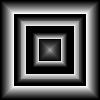

In [17]:
im_c

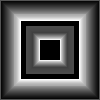

In [18]:
im_m

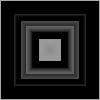

In [19]:
im_y

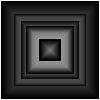

In [20]:
im_k

5. Korzystając z 3 razy z funkcji rysuj_pasy_pionowe_szare(w, h, grub, ?) z zadania 1 z lab3 utwórz
obraz w trybie RGB (obraz6.png), którego
a. kanałem r jest tablica rysuj_pasy_pionowe_szare(300, 200, 10, ?)
b. kanałem g jest tablica rysuj_pasy_pionowe_szare(300, 200, 18, ?)
c. kanałem b jest tablica rysuj_pasy_pionowe_szare(300, 200, 26, ?)

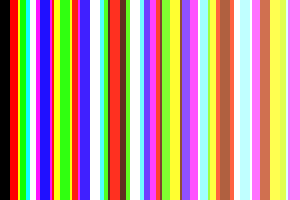

In [21]:
def rysuj_pasy_pionowe_szare(w, h, grub, zmiana_koloru):
    """
    zmiana_koloru - wartość o jaką będzie zmieniał się kolor szary co ramkę
    """
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8) * 255
    ile = int(w / grub) + 1
    szary = 0
    for i in range(ile):
        lewo = i * grub
        if i % 2 == 1:
            continue
        tab[0:h, lewo:lewo + grub] = szary % 256
        szary += zmiana_koloru
    return Image.fromarray(tab)

def rysuj_ramke_kolor(w, h, grub, kolor_ramki, kolor_tla):  # kolor_ramki, kolor podajemy w postaci [r, g, b]
    t = (h, w, 3)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)  # deklaracja tablicy
    tab[:] = kolor_ramki  # wypełnienie tablicy kolorem kolor_ramki
    tab[grub:h - grub, grub:w - grub, 0] = kolor_tla[0]  # wartości kanału R
    tab[grub:h - grub, grub:w - grub, 1] = kolor_tla[1]  # wartości kanału G
    tab[grub:h - grub, grub:w - grub, 2] = kolor_tla[2]  # wartości kanału B
    # tab[grub:h - grub, grub:w - grub] = kolor_tla # wersja równoważna
    return Image.fromarray(tab)


kanal_r = np.asarray(rysuj_pasy_pionowe_szare(300, 200, 10, 16), dtype=np.uint8)
kanal_g = np.asarray(rysuj_pasy_pionowe_szare(300, 200, 18, 16), dtype=np.uint8)
kanal_b = np.asarray(rysuj_pasy_pionowe_szare(300, 200, 26, 16), dtype=np.uint8)
tab_rgb = np.array(rysuj_ramke_kolor(300, 200, 10, 128, (255, 255, 255)), dtype=np.uint8)
tab_rgb[:, :, 0] = kanal_r.copy()
tab_rgb[:, :, 1] = kanal_g.copy()
tab_rgb[:, :, 2] = kanal_b.copy()
im_rgb = Image.fromarray(tab_rgb)
# im_rgb.save('obraz6.png', 'PNG')
im_rgb

6. Utwórz obraz w trybie RGBA (obraz7.png), który powstaje z obrazu RGB z pkt.5 oraz tablicy
kanału alfa otrzymanej z fukcji rysuj_po_skosie_szare(w, h, a, b) gdzie a = liczba
liter w imieniu, b = liczba liter w nazwisku, w, h dobrane tak by było
dobrze.


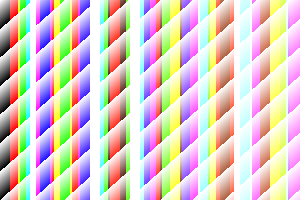

In [22]:
kanal_alfa = rysuj_po_skosie_szare(200, 300, len("Krzysztof"), len("Krupicki"))
kanal_alfa_ext = np.expand_dims(kanal_alfa, axis=-1)
combined = np.concatenate((im_rgb, kanal_alfa_ext), axis=-1)
im_rgba = Image.fromarray(combined)
# im_rgba.save('obraz7.png', 'PNG')
im_rgba

7. Stosując funkcję podaną w lab4.ipynb Dokonaj konwersji obrazu z pkt. 5 na obraz w trybie CMYK
(obraz8.tiff).
a. Porównaj „na oko” kanał r (r.png) obrazu z pkt.5 z kanałem c (c.png) otrzymanego obrazu
i opisz słownie różnice.
b. Zaproponuj „formalny” sposób porównania tych obrazów

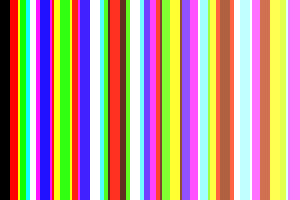

In [23]:
def rgb_to_cmyk(rgb_array):
    # Przekształć wartości RGB na zakres [0, 1]
    rgb = rgb_array.astype(float) / 255
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]

    # Oblicz kanał Kk (black)
    k = 1 - np.max(rgb, axis=2)

    # Uniknij dzielenia przez zero
    c = (1 - r - k) / (1 - k + 1e-8)
    m = (1 - g - k) / (1 - k + 1e-8)
    y = (1 - b - k) / (1 - k + 1e-8)

    # Zastąp NaN (dla czystej czerni) zerami
    c[np.isnan(c)] = 0
    m[np.isnan(m)] = 0
    y[np.isnan(y)] = 0

    # Przekształć na zakres [0, 255]
    cmyk = np.stack((c, m, y, k), axis=2) * 255

    return cmyk.astype(np.uint8)


# Konwersja do CMYK
t_cmyk = rgb_to_cmyk(np.asarray(im_rgb, dtype=np.uint8))

image_cmyk = Image.fromarray(t_cmyk, mode="CMYK")
# image_cmyk.save("obraz8.tiff")
image_cmyk

a. Porównaj „na oko” kanał r (r.png) obrazu z pkt.5 z kanałem c (c.png) otrzymanego obrazu
i opisz słownie różnice.

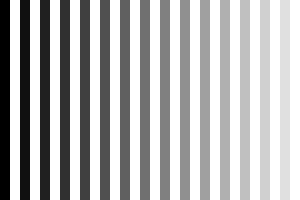

In [24]:
im_r = Image.fromarray(kanal_r)
# im_r.save('r.png', 'PNG')
im_r

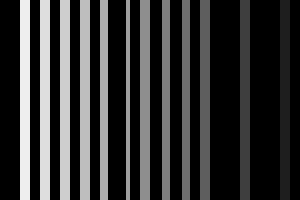

In [25]:
im_c = Image.fromarray(t_cmyk[:, :, 0])
# im_c.save('c.png', 'TIFF')
im_c

Odpowiedź:\
Na kanale R rozłożenie koloru jest regularne co tą samą ilość pikseli i taką samą grubość paska, a na kanale C kolor jest rozłożony co nie regularną ilość pikseli, czasem szerszy, a czasem węższy pasek.

b. Zaproponuj „formalny” sposób porównania tych obrazów.

Odpowiedź:\
Monotoniczność rozkładu barw